In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
lr_onevar = pd.read_csv('ex1data1.txt', sep=',', header=None, names=["population", "profit"])

In [8]:
print(lr_onevar.shape)
lr_onevar.head()

(97, 2)


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


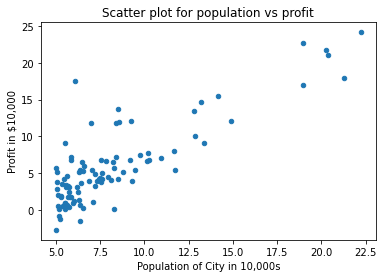

In [24]:
# sns.scatterplot(x='population', y='profit', data=lr_onevar)
lr_onevar.plot(kind='scatter', x='population', y='profit')
plt.title('Scatter plot for population vs profit')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.show()

In [42]:
x = lr_onevar.iloc[:,0]
y = lr_onevar.iloc[:, 1]

m = len(x) #no.of inputs 

# np.insert(x, 0, 1, axis=1)
x = np.stack([np.ones(m), x], axis=1)

In [44]:
# x

In [47]:
#Cost function
def costFunction(x, y, theta):
    #Computing hypothesis
    y_pred = np.dot(x, theta)
    J = (1/(2*m)) * np.sum(np.square(y_pred - y))
    return J

In [50]:
output = costFunction(x, y, np.array([0.0, 0.0]))
output

32.072733877455676

In [63]:
#Gradient Descent for one variable Linear Regression

iterations = 1500
alpha = 0.01
cost_function_array = []
theta_array = []

def gradientDescent(x, y, theta, alpha, iterations):
    for i in range(iterations):
        theta_array.append(theta)
                
        #Computing hypothesis
        y_pred = np.dot(x, theta)    
        
        #Computing Cost Function
        J = (1/(2*m)) * np.sum(np.square(y_pred - y))
        
        #Computing Gradient Descent
        theta = theta - np.dot((alpha*(1/m)*(y_pred - y)), x)
        
        cost_function_array.append(J)
        
    return theta, cost_function_array, theta_array
    

In [64]:
theta, cf_values, theta_values = gradientDescent(x, y, np.array([0, 0]), alpha, iterations)

In [68]:
theta

array([-3.63029144,  1.16636235])

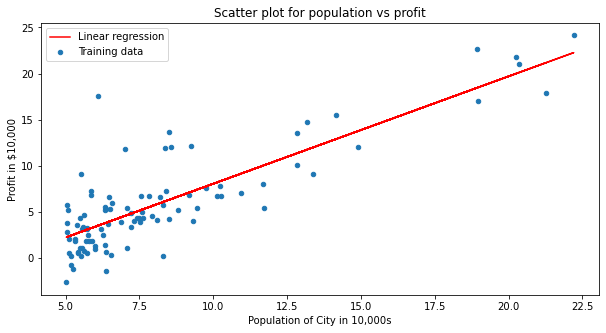

In [91]:
# plt.figure(figsize=(20,20))
lr_onevar.plot(kind='scatter', x='population', y='profit', figsize=(10,5))
plt.plot(x[:,1], np.dot(x, theta), c='r')
plt.title('Scatter plot for population vs profit')
plt.ylabel('Profit in $10,000')
plt.xlabel('Population of City in 10,000s')
plt.legend(['Linear regression','Training data']);

plt.show()

In [94]:
#Predicting values for population 35K and 70K

predict1 = np.dot([1, 3.5], theta)
print("Prdicted profit for the population 35,000 is ", predict1*10000)
predict2 = np.dot([1, 7], theta)
print("Prdicted profit for the population 35,000 is ", predict2*10000)

Prdicted profit for the population 35,000 is  4519.767867701763
Prdicted profit for the population 35,000 is  45342.450129447134
